# Реализовать обучение линейной регрессии для задачи boston house prices



In [1]:
import torch
from torch import autograd
from google.colab import files
from IPython import display
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import torch.nn as nn
from torch.autograd import Variable
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Загрузил данные

In [2]:
file = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

## Предварительный анализ

In [4]:
housingData = pd.read_csv("kc_house_data.csv")

In [5]:
# Preliminary Analysis
print(housingData.head())
print(housingData.isnull().any())
print(housingData.dtypes)


           id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]
id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dt

In [6]:
housingData

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

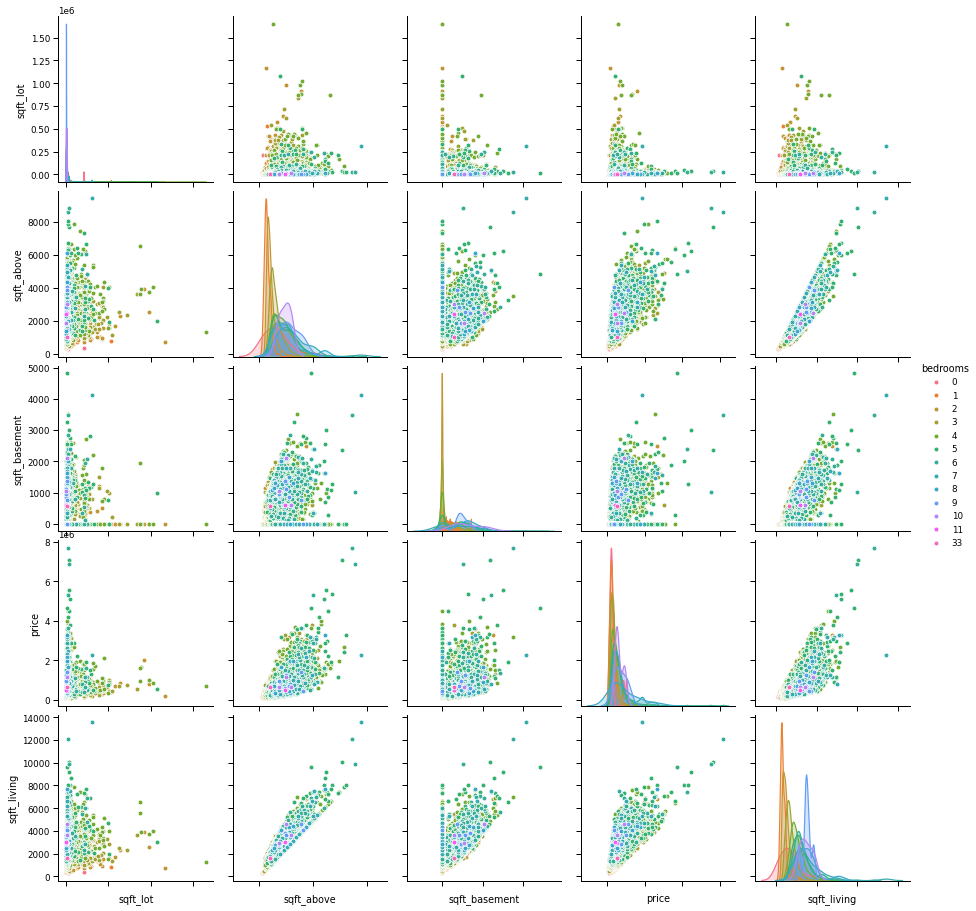

<Figure size 432x288 with 0 Axes>

In [7]:
with sns.plotting_context("paper") :
    g = sns.pairplot(housingData[['sqft_lot','sqft_above','sqft_basement','price','sqft_living','bedrooms']], 
                hue='bedrooms')
g.set(xticklabels=[])

plt.show()
plt.clf()

In [8]:
space = housingData['sqft_living']
price = housingData['price']

x_train = np.array(space).reshape(-1, 1).astype('float32')
y_train = np.array(price).reshape(-1,1).astype('float32')

## Модель линейной регрессии, Потери и оптимизатор

In [9]:
model = LinearRegressionModel(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.00000001)  

# Обучить модель

In [10]:
num_epochs = 600
for epoch in range(num_epochs):
    # Преобразование массивов numpy в тензоры torch
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Очистка градиентов по параметрам
    optimizer.zero_grad()

    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    
    # Вернуться и оптимизировать
    loss.backward() # Обратное распространение
    optimizer.step() # Обновление параметров
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/600], Loss: 219068104704.0000
Epoch [10/600], Loss: 119162937344.0000
Epoch [15/600], Loss: 85617967104.0000
Epoch [20/600], Loss: 74354720768.0000
Epoch [25/600], Loss: 70572867584.0000
Epoch [30/600], Loss: 69303050240.0000
Epoch [35/600], Loss: 68876705792.0000
Epoch [40/600], Loss: 68733550592.0000
Epoch [45/600], Loss: 68685475840.0000
Epoch [50/600], Loss: 68669325312.0000
Epoch [55/600], Loss: 68663914496.0000
Epoch [60/600], Loss: 68662095872.0000
Epoch [65/600], Loss: 68661485568.0000
Epoch [70/600], Loss: 68661268480.0000
Epoch [75/600], Loss: 68661194752.0000
Epoch [80/600], Loss: 68661178368.0000
Epoch [85/600], Loss: 68661170176.0000
Epoch [90/600], Loss: 68661170176.0000
Epoch [95/600], Loss: 68661170176.0000
Epoch [100/600], Loss: 68661178368.0000
Epoch [105/600], Loss: 68661178368.0000
Epoch [110/600], Loss: 68661178368.0000
Epoch [115/600], Loss: 68661178368.0000
Epoch [120/600], Loss: 68661166080.0000
Epoch [125/600], Loss: 68661178368.0000
Epoch [130/600], L

## Постройте график

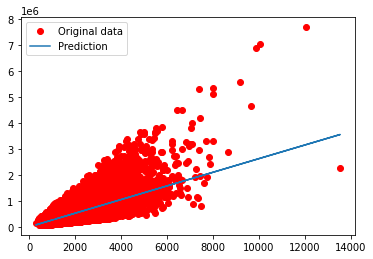

In [11]:
predicted = model.forward(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Prediction')
plt.legend()
plt.show()

# Классификация рукописных чисел полносвязной сетью

In [12]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets

In [13]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [14]:
torch.cuda.is_available()

True

In [15]:
!nvidia-smi

Sun Sep 27 19:10:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Загрузил данные

In [16]:
MNIST_train = torchvision.datasets.MNIST('./', download=True,train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True,train=False)

# Разделил данные на тренировочные и проверочные

In [17]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Просмотренл получившиеся данные

In [18]:
X_train.dtype,y_train.dtype

(torch.uint8, torch.int64)

In [19]:
X_train = X_train.float()
X_test = X_test.float()

In [20]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

tensor(5)

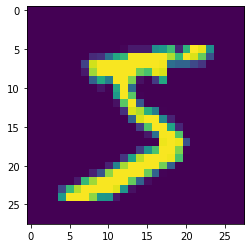

In [21]:
plt.imshow(X_train[0,:,:])
y_train[0]

In [22]:
X_train = X_train.reshape([-1,28*28])
X_test = X_test.reshape([-1,28*28])

## Модель

In [23]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__() 
    
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
    self.ac2 = torch.nn.Softmax()
    
  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x
  

mnist_net = MNISTNet(200)

In [24]:
# определение функции потерь
loss = torch.nn.CrossEntropyLoss()

# оптимизатор 
optimizer = torch.optim.Adam(mnist_net.parameters(),lr=1.0e-3) 

## загрузить nn в GPU

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)

## проверка загрузки в gpu

In [26]:
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [-0.0003, -0.0266, -0.0199,  ..., -0.0062,  0.0150,  0.0341],
         [ 0.0225, -0.0305, -0.0323,  ..., -0.0297, -0.0068,  0.0167],
         [ 0.0355,  0.0328,  0.0346,  ...,  0.0050,  0.0082,  0.0149]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([ 0.0218,  0.0222, -0.0333,  0.0142,  0.0195,  0.0289,  0.0022,  0.0219,
         -0.0132, -0.0087, -0.0060, -0.0198, -0.0287,  0.0335,  0.0217, -0.0139,
         -0.0085,  0.0293,  0.0251,  0.0221,  0.0271, -0.0113, -0.0173, -0.0055,
          0.0130,  0.0355, -0.0054,  0.0252,  0.0157,  0.0088,  0.0016, -0.0191,
          0.0270, -0.0032,  0.0253, -0.0306, -0.0191,  0.0272,  0.0096, -0.0293,
          0.0132,  0.0264, -0.0196, -0.0064,  0.0326, -0.0205, 

## Цикл обучения

In [28]:
batch_size = 100
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
  
  order = np.random.permutation(len(X_train)) # перемешиваем индексы
  
  for start_index in range(0,len(X_train), batch_size):
    optimizer.zero_grad()
    

    batch_indexes = order[start_index:start_index+batch_size]
    
    X_batch = X_train[batch_indexes].to(device) # to gpu
    y_batch = y_train[batch_indexes].to(device) # to gpu
    
    preds = mnist_net.forward(X_batch)
    
    loss_value = loss(preds, y_batch)
    
    loss_value.backward()
    
    optimizer.step()
    
  test_preds = mnist_net.forward(X_test)
  
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  
#   accuracies.append(accuracy)
  
  print(accuracy)

tensor(0.9538, device='cuda:0')
tensor(0.9587, device='cuda:0')
tensor(0.9639, device='cuda:0')
tensor(0.9602, device='cuda:0')
tensor(0.9611, device='cuda:0')
tensor(0.9602, device='cuda:0')
tensor(0.9615, device='cuda:0')
tensor(0.9640, device='cuda:0')
tensor(0.9640, device='cuda:0')
tensor(0.9631, device='cuda:0')
tensor(0.9623, device='cuda:0')
tensor(0.9618, device='cuda:0')
tensor(0.9628, device='cuda:0')
tensor(0.9626, device='cuda:0')
tensor(0.9639, device='cuda:0')
tensor(0.9637, device='cuda:0')
tensor(0.9616, device='cuda:0')
tensor(0.9662, device='cuda:0')
tensor(0.9610, device='cuda:0')
tensor(0.9637, device='cuda:0')
tensor(0.9627, device='cuda:0')
tensor(0.9633, device='cuda:0')
tensor(0.9629, device='cuda:0')
tensor(0.9613, device='cuda:0')
tensor(0.9639, device='cuda:0')
tensor(0.9611, device='cuda:0')
tensor(0.9639, device='cuda:0')
tensor(0.9634, device='cuda:0')
tensor(0.9640, device='cuda:0')
tensor(0.9635, device='cuda:0')
tensor(0.9653, device='cuda:0')
tensor(0